# **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**
### 1. KNN bisa digunakan untuk deteksi outlier
K-Nearest Neighbors (KNN) dapat dimanfaatkan untuk mendeteksi outlier karena algoritma ini peka terhadap jarak antar data. KNN bukan hanya algoritma untuk klasifikasi, tetapi juga efektif untuk mengidentifikasi data yang menyimpang dari pola umum. Dengan kemampuannya dalam menghitung jarak antar titik data, KNN bisa mengenali data yang terisolasi atau jauh dari kelompok data lainnya, sehingga dapat dikategorikan sebagai outlier.

### 2. Langkah-Langkah Deteksi Outlier dengan KNN  
a. Menentukan K (Jumlah Tetangga Terdekat)  
Langkah awal adalah memilih jumlah tetangga terdekat (K). Data diurutkan berdasarkan jarak yang telah dihitung sebelumnya, lalu dipilih K data terdekat dari titik yang sedang dianalisis.
- Apabila K terlalu kecil, model bisa menjadi sangat peka terhadap noise.
- Sebaliknya, jika K terlalu besar, proses identifikasi outlier menjadi kurang efektif karena data ekstrem dapat dianggap normal.

b. Menghitung Skor Kepadatan (Density Score)  
Terdapat beberapa metode yang dapat digunakan untuk menentukan apakah suatu titik termasuk outlier atau tidak, di antaranya :  
1. Terdapat beberapa metode yang dapat digunakan untuk menentukan apakah suatu titik termasuk outlier atau tidak, di antaranya:
Mengukur rata-rata jarak suatu titik ke K tetangga terdekatnya. Jika rata-rata jarak tersebut jauh lebih besar dibanding titik lain, maka titik tersebut berpotensi sebagai outlier.
2. Faktor Outlier Lokal (Local Outlier Factor/LOF)  
Metode ini membandingkan tingkat kepadatan di sekitar suatu titik dengan kepadatan di sekitar tetangganya. Jika kepadatan titik tersebut jauh lebih rendah, maka titik tersebut dapat dikategorikan sebagai outlier.
3. Skor Outlier Berdasarkan Jarak (Distance-Based Outlier Score)
Pada pendekatan ini, jika sebuah titik hanya memiliki sedikit atau bahkan tidak memiliki tetangga dalam radius tertentu, maka titik tersebut kemungkinan besar merupakan outlier.


## Kesimpulan
Deteksi outlier merupakan langkah penting dalam proses analisis data untuk mengidentifikasi data yang menyimpang dari pola umum. Outlier dapat disebabkan oleh berbagai faktor, seperti kesalahan pencatatan data, gangguan sistem, atau bahkan informasi baru yang perlu diperhatikan. K-Nearest Neighbors (KNN) merupakan salah satu metode yang efektif untuk mendeteksi outlier karena algoritma ini bekerja berdasarkan jarak antar data. Dengan menghitung jarak ke sejumlah K tetangga terdekat, KNN dapat mengidentifikasi data yang berada jauh dari kelompok utamanya.

Dalam penerapannya, terdapat beberapa tahapan penting yang harus dilakukan, yaitu menentukan jumlah K tetangga terdekat yang optimal, serta menghitung skor kepadatan (density score) menggunakan metode seperti K-Nearest Neighbor Distance, Local Outlier Factor (LOF), atau Distance-Based Outlier Score.

Secara keseluruhan, KNN menjadi salah satu metode yang sederhana namun kuat untuk mendeteksi outlier, sehingga dapat membantu meningkatkan kualitas dan keandalan data sebelum dilakukan proses analisis lanjutan.

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.0 MB/s eta 0:00:00


 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  1     Iris-setosa           1.4          0.2           5.1          3.5      4.047221        False
  2     Iris-setosa           1.4          0.2           4.9          3.0      4.062019        False
  3     Iris-setosa           1.3          0.2           4.7          3.2      4.250882        False
  5     Iris-setosa           1.4          0.2           5.0          3.6      4.103657        False
  6     Iris-setosa           1.7          0.4           5.4          3.9      3.712142        False
  7     Iris-setosa           1.4          0.3           4.6          3.4      4.217819        False
  8     Iris-setosa           1.5          0.2           5.0          3.4      3.968627        False
  9     Iris-setosa           1.4          0.2           4.4          2.9      4.208325        False
 10     Iris-setosa          14.0          2.0          40.6         30.1     45.440290    

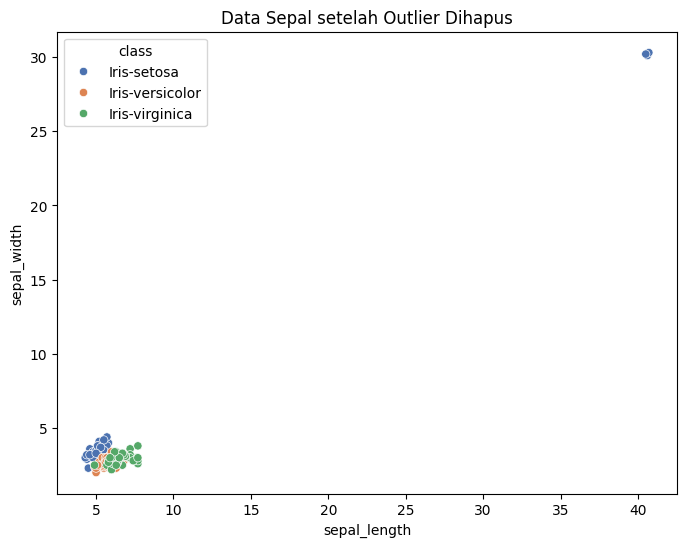

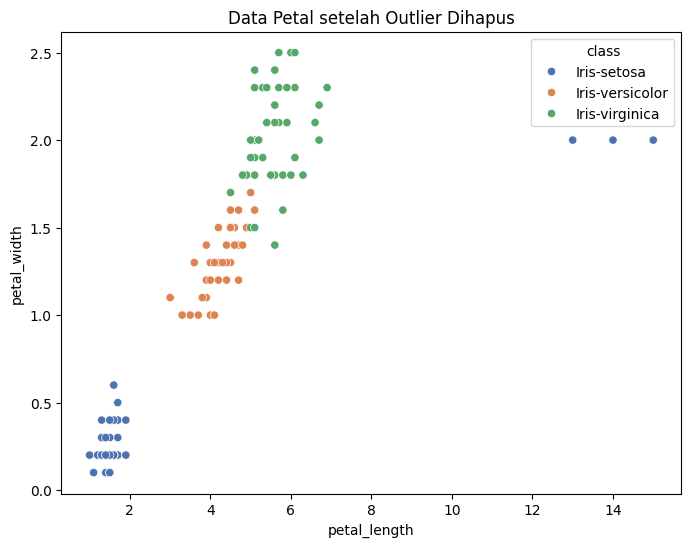

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="farah-postgresqll.l.aivencloud.com",
        user="avnadmin",
        password="AVNS_rVI6WGJ0hdN4E7M2KsB",
        database="defaultdb",
        port=12624
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1db1966d-mmysqll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_VBsJWG-RQvJ7y8sPwxg",
        database="iris_mysql",
        port=11704
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=90):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=90)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Hapus data outlier
df_filtered = df_merged[~df_merged["outlier_knn"]]

# Cetak hasil setelah outlier dihapus
print(df_filtered.to_string(index=False))
print(f"\nJumlah data setelah outlier dihapus: {len(df_filtered)}")

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["sepal_length"], y=df_filtered["sepal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Sepal setelah Outlier Dihapus")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["petal_length"], y=df_filtered["petal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Petal setelah Outlier Dihapus")
plt.show()

Kode ini digunakan untuk menghapus outlier dari dataset Iris, yang diambil dari dua sumber data, yakni MySQL dan PostgreSQL. Data dari kedua database dikombinasikan berdasarkan kolom id dan class, kemudian fitur numerik seperti petal_length, petal_width, sepal_length, dan sepal_width digunakan untuk analisis lebih lanjut.

Dalam proses deteksi outlier, kode ini memanfaatkan metode K-Nearest Neighbors (KNN) dengan menghitung jarak ke tetangga ke-90 untuk setiap titik data. Jarak tersebut dijadikan sebagai indikator outlier, dengan batasan (threshold) yang ditentukan berdasarkan rata-rata jarak ditambah 2 kali standar deviasi. Data yang memiliki jarak lebih besar dari threshold diklasifikasikan sebagai outlier dan dihapus dari dataset.

Setelah proses pembersihan selesai, kode akan menampilkan jumlah data yang tersisa serta menyajikan scatter plot untuk memvisualisasikan distribusi data sebelum dan sesudah penghapusan outlier. Dengan demikian, dataset menjadi lebih bersih, meminimalkan pengaruh data ekstrem, dan lebih siap untuk analisis atau pemodelan yang lebih akurat.

## **Memisahkan outlier dari data**

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="farah-postgresqll.l.aivencloud.com",
        user="avnadmin",
        password="AVNS_rVI6WGJ0hdN4E7M2KsB",
        database="defaultdb",
        port=12624
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1db1966d-mmysqll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_VBsJWG-RQvJ7y8sPwxg",
        database="iris_mysql",
        port=11704
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa           1.4          0.2           4.9          3.0              1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa          14.0          2.0          50.2         30.6             -1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa          14.0          2.0          40.6         30.1             -1
 11     Iris-setosa  

Kode ini digunakan untuk mendeteksi dan memisahkan outlier dari dataset yang berasal dari dua sumber basis data, yaitu PostgreSQL dan MySQL. Proses dimulai dengan menghubungkan ke kedua basis data menggunakan pustaka psycopg2 untuk PostgreSQL dan pymysql untuk MySQL. Setelah koneksi berhasil, kode mengeksekusi query untuk mengambil seluruh data dari tabel "iris_postgresql" dan "irismysql", lalu mengonversinya menjadi DataFrame menggunakan pustaka pandas.

Selanjutnya, kedua dataset tersebut digabungkan berdasarkan kolom "id" dan "class" menggunakan inner join, sehingga hanya data yang ada di kedua tabel yang dipertahankan. Setelah penggabungan, hanya fitur numerik seperti "petal_length", "petal_width", "sepal_length", dan "sepal_width" yang digunakan untuk analisis outlier. Untuk mendeteksi outlier, kode menerapkan model Local Outlier Factor (LOF) dari pustaka scikit-learn, dengan parameter n_neighbors=90, yang berarti setiap titik data dibandingkan dengan 90 tetangga terdekatnya untuk menentukan apakah data tersebut termasuk outlier atau tidak.

LOF memberikan label 1 untuk data normal dan -1 untuk data yang dianggap outlier. Hasil deteksi ini kemudian ditambahkan ke dalam DataFrame dengan kolom "outlier_label", dan jumlah total outlier dihitung berdasarkan jumlah data dengan label -1. Dataset kemudian dipisahkan menjadi dua bagian, yaitu data normal (df_filtered) dan data outlier (outliers). Akhirnya, kode mencetak hasil deteksi outlier, termasuk jumlah total outlier, daftar data yang dikategorikan sebagai outlier, serta data yang tersisa setelah proses pembersihan. Dengan pendekatan ini, dataset menjadi lebih bersih, sehingga mengurangi potensi bias dalam analisis atau pemodelan pembelajaran mesin.









## **Menghitung Akurasi dari data**

In [4]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.8
                 precision    recall  f1-score   support

    Iris-setosa       0.64      0.90      0.75        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.80        30
      macro avg       0.84      0.80      0.81        30
   weighted avg       0.84      0.80      0.81        30

Akurasi tanpa outlier: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.96        27
      macro avg       0.96      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27



Kode ini bertujuan untuk membandingkan akurasi dan hasil pada model K-Nearest Neighbors (KNN). Data diambil, label kelas dikonversi ke numerik, lalu metode Local Outlier Factor (LOF) diterapkan untuk mendeteksi dan menghapus outlier. Dataset kemudian dibagi menjadi training (80%) dan testing (20%), baik untuk versi data dengan outlier maupun tanpa outlier. Model KNN dengan 11 tetangga dilatih menggunakan Pipeline yang mencakup StandardScaler. Akurasi dan laporan klasifikasi dibandingkan untuk melihat pengaruh outlier terhadap performa model, di mana diharapkan data tanpa outlier menghasilkan akurasi lebih tinggi.

## **Visualisasi data**

Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.96        27
      macro avg       0.96      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27



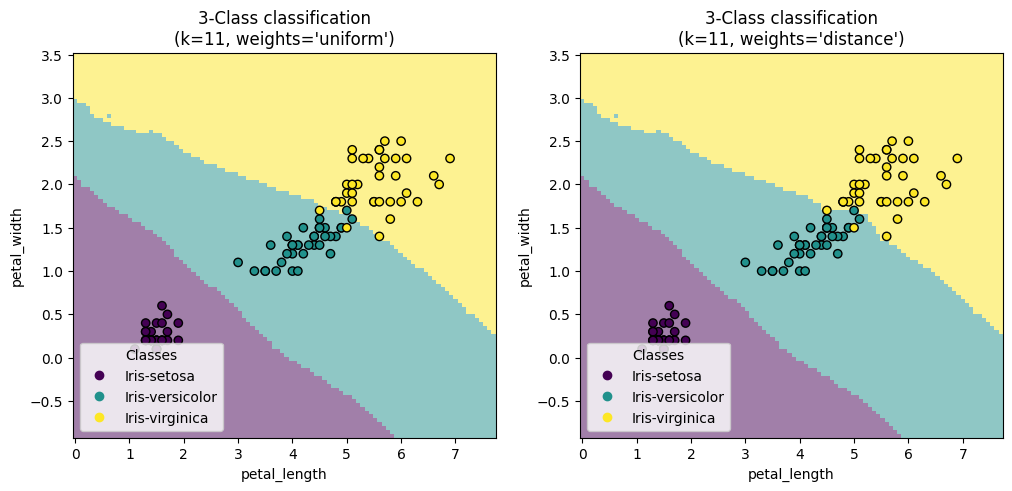

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_cleaned[feature_columns]
y = df_cleaned["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Akurasi: 0.8148148148148148
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.67      0.57      0.62         7
 Iris-virginica       0.67      0.75      0.71         8

       accuracy                           0.81        27
      macro avg       0.78      0.77      0.77        27
   weighted avg       0.81      0.81      0.81        27



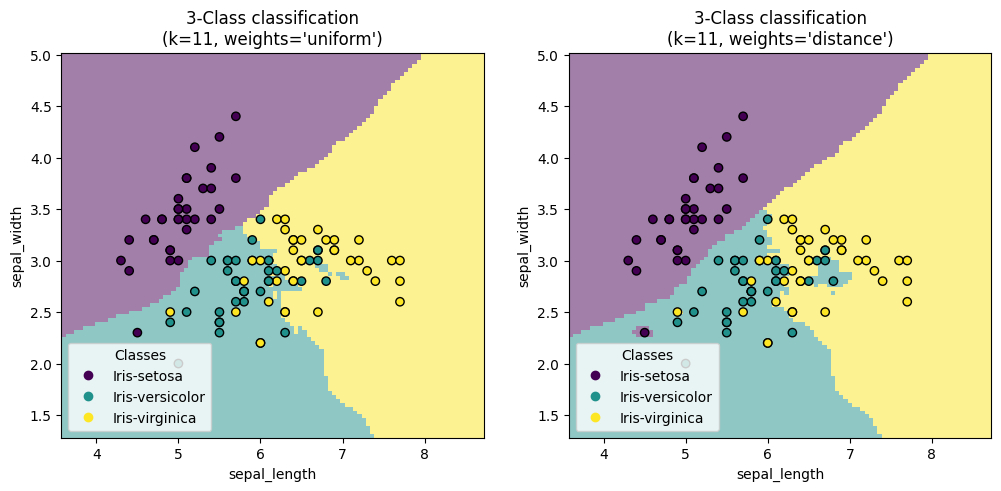

In [6]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["sepal_length", "sepal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


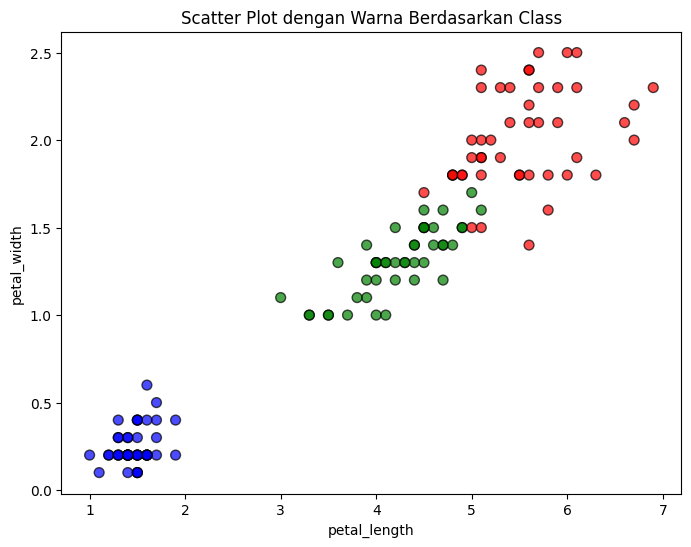

In [7]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal_length"
y_feature = "petal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

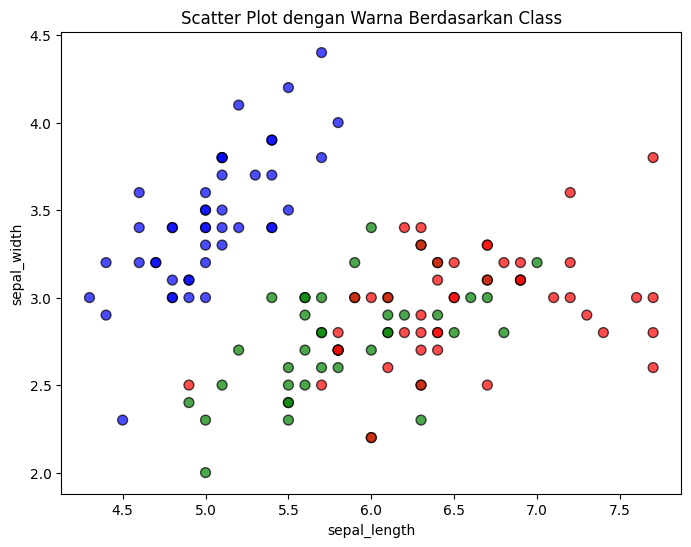

In [8]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal_length"
y_feature = "sepal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

## **Implementasi Naive Bayes pada Data**

Number of mislabeled points with outliers out of a total 30 points : 21
Accuracy with outliers: 30.00%
Mislabeled points with outliers:
Index: 0, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 1, True Label: Iris-setosa, Predicted: Iris-virginica
Index: 3, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 4, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 5, True Label: Iris-setosa, Predicted: Iris-virginica
Index: 6, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 8, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 9, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 11, True Label: Iris-setosa, Predicted: Iris-virginica
Index: 12, True Label: Iris-setosa, Predicted: Iris-virginica
Index: 14, True Label: Iris-setosa, Predicted: Iris-virginica
Index: 15, True Label: Iris-versicolor, Predicted: Iris-virginica
Index: 16, True Label: Iris-virginica, Predicted: Iris-setosa
Index: 17, True Label: Iris-versicolor, Pred

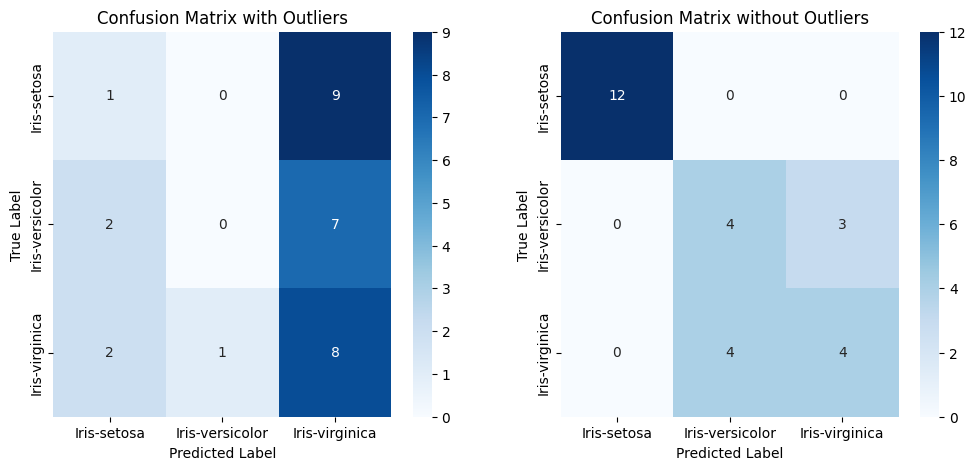

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_merged sudah ada dari kode sebelumnya

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
df_merged["class_encoded"] = label_encoder.fit_transform(df_merged["class"])

# Data dengan outlier
X_all = df_merged[feature_columns]
y_all = df_merged["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Data tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])
X_clean = df_cleaned[feature_columns]
y_clean = df_cleaned["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Split data dengan outlier
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

# Split data tanpa outlier
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
gnb = GaussianNB()

# Latih dan uji model dengan outlier
y_pred_all = gnb.fit(X_train_all, y_train_all).predict(X_test_all)
mislabeled_all = (y_test_all != y_pred_all).sum()
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Number of mislabeled points with outliers out of a total %d points : %d" % (X_test_all.shape[0], mislabeled_all))
print("Accuracy with outliers: %.2f%%" % (accuracy_all * 100))

# Menampilkan label yang salah pada data dengan outlier
mislabeled_indices_all = np.where(y_test_all != y_pred_all)[0]
print("Mislabeled points with outliers:")
for i in mislabeled_indices_all:
    true_label = label_encoder.inverse_transform([int(y_test_all[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_all[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")
print()
# Latih dan uji model tanpa outlier
y_pred_clean = gnb.fit(X_train_clean, y_train_clean).predict(X_test_clean)
mislabeled_clean = (y_test_clean != y_pred_clean).sum()
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Number of mislabeled points without outliers out of a total %d points : %d" % (X_test_clean.shape[0], mislabeled_clean))
print("Accuracy without outliers: %.2f%%" % (accuracy_clean * 100))

# Menampilkan label yang salah pada data tanpa outlier
mislabeled_indices_clean = np.where(y_test_clean != y_pred_clean)[0]
print("Mislabeled points without outliers:")
for i in mislabeled_indices_clean:
    true_label = label_encoder.inverse_transform([int(y_test_clean[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_clean[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_all, y_pred_all), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix with Outliers")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix without Outliers")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()